<a href="https://colab.research.google.com/github/Esmaysl/Dogal_D_Is/blob/main/Tuz_Karabiber_g%C3%BCr%C3%BClt%C3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Gerekli kütüphaneleri içe aktar
import cv2              # Görüntü işleme için OpenCV kütüphanesi
import numpy as np      # Sayısal işlemler için NumPy
import matplotlib.pyplot as plt  # Görsel göstermek için

from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Görsel yükleniyor
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Görseli renkli olarak oku (BGR)
image_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)

# BGR → RGB dönüşüm
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Şekil kontrolü
print("image.shape:", image.shape)  # (h, w, 3) olmalı

Saving resinm.jpg to resinm.jpg
image.shape: (720, 720, 3)


Saving resinm.jpg to resinm (1).jpg


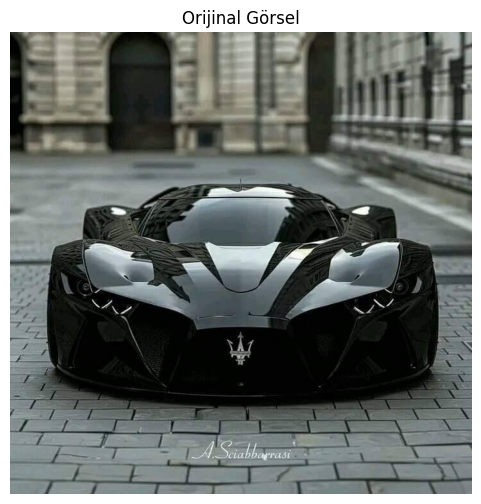

In [15]:

# Google Colab üzerinde görsel yüklemek için:
from google.colab import files
from PIL import Image

# Görsel yükleme (sen bir dosya seçince otomatik olarak yüklenecek)
uploaded = files.upload()
img_path = list(uploaded.keys())[0]



# Orijinal görüntüyü göster
plt.figure(figsize=(6,6))
plt.title("Orijinal Görsel")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [17]:
import numpy as np  # NumPy, diziler ve rastgele sayı üretimi için kullanılır

def add_salt_pepper_noise_color(image, amount=0.02, salt_vs_pepper=0.5):
    """
    Renkli (RGB) görüntüye tuz-karabiber (salt & pepper) gürültüsü ekler.

    Parametreler:
    - image: Renkli (RGB) görüntü (NumPy array formatında)
    - amount: Gürültü oranı (0.02 = toplam piksellerin %2’sine gürültü uygulanır)
    - salt_vs_pepper: Tuz (beyaz) ve karabiber (siyah) oranı (0.5 = eşit sayıda)

    Geri dönüş:
    - Gürültü eklenmiş renkli görüntü
    """

    # Orijinal görüntünün bir kopyasını alıyoruz ki üzerine doğrudan işlem yapabilelim
    noisy = np.copy(image)

    # Görüntünün boyutlarını al: yükseklik (h), genişlik (w), kanal sayısı (c)
    h, w, c = noisy.shape

    # Toplam piksel sayısı = yükseklik * genişlik
    num_pixels = h * w

    # Tuz (beyaz piksel) sayısını hesapla
    num_salt = int(amount * num_pixels * salt_vs_pepper)

    # Her tuz noktası için rastgele (x, y) koordinatları oluştur ve beyaz yap
    for _ in range(num_salt):
        y = np.random.randint(0, h)  # 0 ile h-1 arası rastgele satır
        x = np.random.randint(0, w)  # 0 ile w-1 arası rastgele sütun
        noisy[y, x] = [255, 255, 255]  # RGB tüm kanallara 255 ver → beyaz nokta

    # Karabiber (siyah piksel) sayısını hesapla
    num_pepper = int(amount * num_pixels * (1 - salt_vs_pepper))

    # Her karabiber noktası için rastgele koordinatlar oluştur ve siyah yap
    for _ in range(num_pepper):
        y = np.random.randint(0, h)
        x = np.random.randint(0, w)
        noisy[y, x] = [0, 0, 0]  # RGB tüm kanallara 0 ver → siyah nokta

    # Gürültülü görüntüyü geri döndür
    return noisy


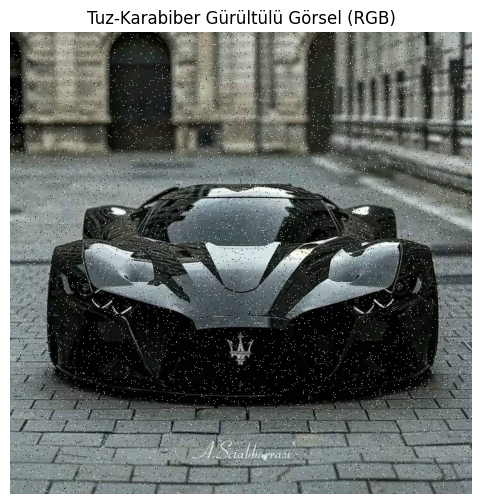

In [18]:
# Daha önce tanımladığımız fonksiyon kullanılarak görsele tuz-karabiber gürültüsü ekleniyor
# amount=0.03 → toplam piksellerin %3’üne gürültü eklenecek
noisy_color_image = add_salt_pepper_noise_color(image, amount=0.03)

# Yeni bir görsel penceresi oluşturuluyor, boyutu 6x6 inç olarak ayarlandı
plt.figure(figsize=(6, 6))

# Grafiğin başlığı veriliyor
plt.title("Tuz-Karabiber Gürültülü Görsel (RGB)")

# Gürültü eklenmiş renkli görüntü görselleştiriliyor
# cmap parametresi verilmedi çünkü görüntü RGB renkli
plt.imshow(noisy_color_image)

# X ve Y eksenleri gizleniyor (görselin sade görünmesi için)
plt.axis("off")

# Grafiği ekranda göster
plt.show()


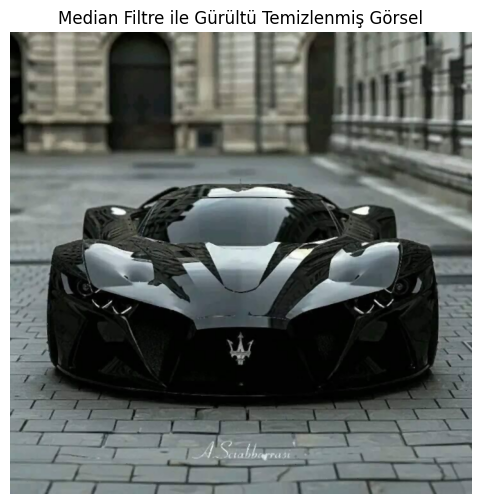

In [19]:
# Gürültü temizlemek için median filtresi uygula
# Median filtre, özellikle tuz-karabiber gibi ani değişim içeren gürültülerde çok etkilidir.
#Median gürültü temizleme filtresi (veya Median Filter) görüntü işleme ve sinyal işleme alanlarında kullanılan bir non-lineer
# (doğrusal olmayan) filtredir ve özellikle tuz ve karabiber (salt-and-pepper) gibi keskin (ani) gürültüleri temizlemede çok etkilidir.

# Renkli bir görüntüde (3 kanallı), her kanal (R, G, B) ayrı ayrı filtrelenir
denoised_image = np.zeros_like(noisy_color_image)  # Aynı boyutta boş dizi oluşturulur

# Her kanal için ayrı ayrı median filtresi uygulanır
for i in range(3):  # 0: Kırmızı, 1: Yeşil, 2: Mavi
    denoised_image[:, :, i] = cv2.medianBlur(noisy_color_image[:, :, i], ksize=3)
    # ksize=3 → 3x3 komşuluk penceresi, istenirse 5 de yapılabilir

# Temizlenmiş görseli göster
plt.figure(figsize=(6, 6))
plt.title("Median Filtre ile Gürültü Temizlenmiş Görsel")
plt.imshow(denoised_image)
plt.axis('off')
plt.show()


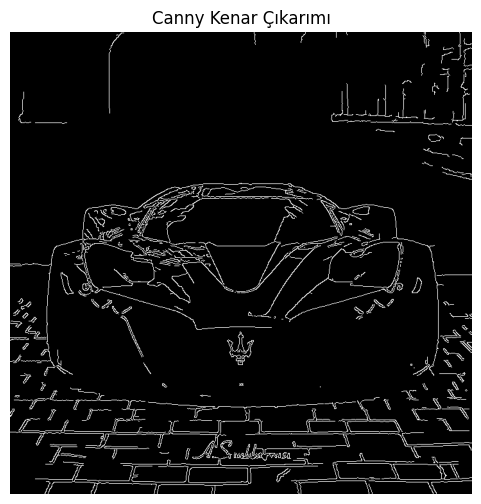

In [20]:
# Canny kenar çıkarımı yalnızca gri tonlamalı görseller üzerinde çalışır
# Bu yüzden önce RGB → Grayscale dönüşümü yapılır
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Canny kenar çıkarım fonksiyonu uygulanır
# threshold1: düşük eşik, threshold2: yüksek eşik
# Bu iki eşik sayesinde belirgin ve zayıf kenarlar ayrıştırılır
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Kenar çıkarılmış (binary) görseli göster
plt.figure(figsize=(6, 6))
plt.title("Canny Kenar Çıkarımı")

plt.imshow(edges, cmap='gray')  # Gri tonlamalı görsel gösterimi
plt.axis('off')
plt.show()


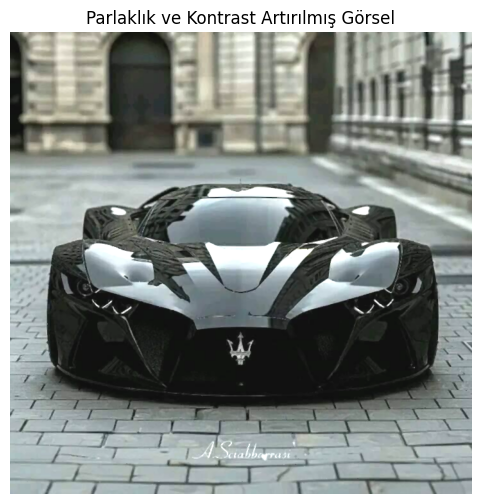

In [21]:
# Görüntünün parlaklığını ve kontrastını artırmak için alpha-beta dönüşümü uygulanır
# Yeni piksel = alpha * eski_piksel + beta
#Alpha-Beta dönüşümü, bir görüntünün parlaklık ve kontrastını ayarlamak için kullanılan basit ama etkili bir yöntemdir

alpha = 1.2  # Kontrast katsayısı (>1 artırır)
beta = 15    # Parlaklık değeri (0-100 arası pozitif değer parlaklığı artırır)

# Görüntüye uygulama (cv2.convertScaleAbs → doygunluk korumalı dönüşüm)
enhanced_image = cv2.convertScaleAbs(denoised_image, alpha=alpha, beta=beta)

# Sonucu göster
plt.figure(figsize=(6, 6))
plt.title("Parlaklık ve Kontrast Artırılmış Görsel")
plt.imshow(enhanced_image)
plt.axis('off')
plt.show()


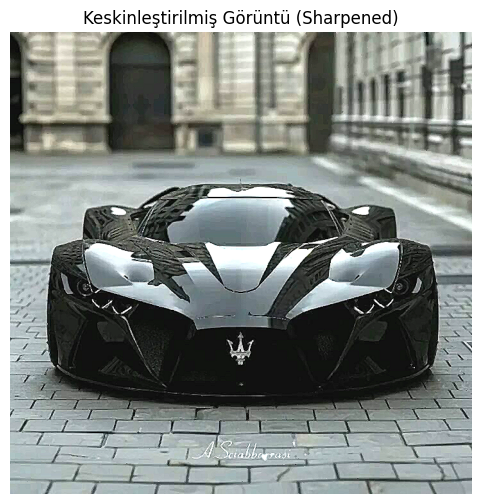

In [22]:
# Görüntüyü keskinleştirmek için sharpen filtresi uygulanır
# Bu filtre, kenarları belirginleştirir ve detayları öne çıkarır

# Sharpening kernel (maske)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Filtreyi uygula (cv2.filter2D → 2D konvolüsyon)
sharpened_image = cv2.filter2D(enhanced_image, -1, sharpen_kernel)

# Sonucu göster
plt.figure(figsize=(6, 6))
plt.title("Keskinleştirilmiş Görüntü (Sharpened)")
plt.imshow(sharpened_image)
plt.axis('off')
plt.show()


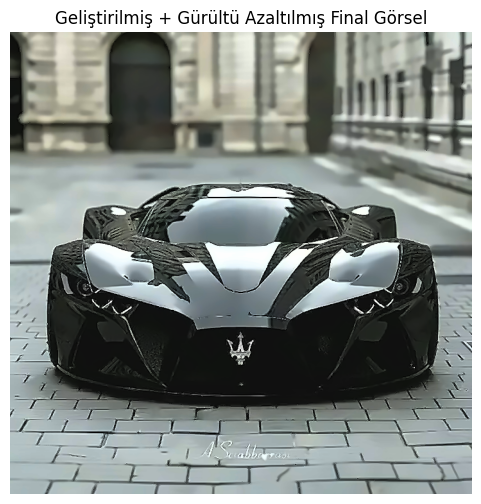

In [23]:
# Fazladan kalan gürültüleri azaltmak için Non-Local Means algoritması kullanılır
# Bu yöntem, görüntüdeki benzer alanları baz alarak gürültü azaltır

# cv2.fastNlMeansDenoisingColored, renkli görüntüler için uygundur
final_denoised = cv2.fastNlMeansDenoisingColored(sharpened_image, None,
                                                  h=10,  # Filtre gücü (yüksekse daha fazla yumuşatma)
                                                  hColor=10,
                                                  templateWindowSize=7,
                                                  searchWindowSize=21)

# Son hali göster
plt.figure(figsize=(6, 6))
plt.title("Geliştirilmiş + Gürültü Azaltılmış Final Görsel")
plt.imshow(final_denoised)
plt.axis('off')
plt.show()
